<a href="https://colab.research.google.com/github/luchia0602/R/blob/main/R1S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

lab 1

In [1]:
library(ggplot2)
library(readr)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [6]:
summary(freq)

      pos             Word            Word_syll            Lemma          
 Min.   :  1.00   Length:250         Length:250         Length:250        
 1st Qu.: 63.25   Class :character   Class :character   Class :character  
 Median :125.50   Mode  :character   Mode  :character   Mode  :character  
 Mean   :125.50                                                           
 3rd Qu.:187.75                                                           
 Max.   :250.00                                                           
    Number             Verbal           Collective           Gender         
 Length:250         Length:250         Length:250         Length:250        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
             

In [13]:
freq <- freq %>%
  mutate(Category = paste(Origin, Gender, sep = "-"))

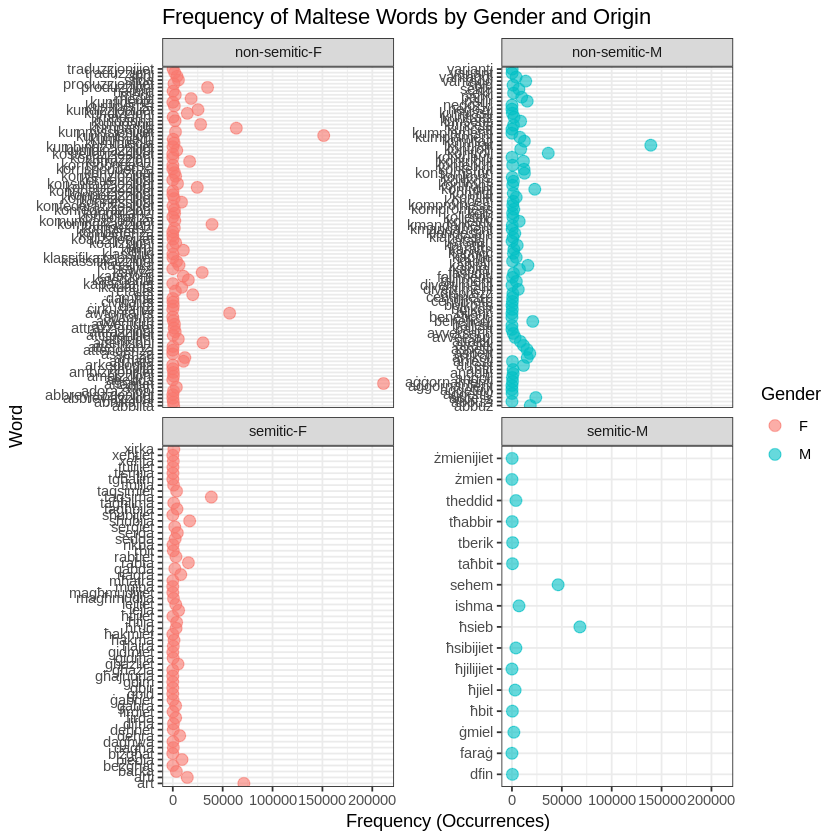

In [16]:
ggplot(freq, aes(x = Occurrences, y = Word, color = Gender)) +
  geom_point(alpha = 0.6, size = 3) +
  facet_wrap(~ Category, scales = "free_y") +
  labs(
    x = "Frequency (Occurrences)",
    y = "Word",
    title = "Frequency of Maltese Words by Gender and Origin"
  ) +
  theme_bw()

lab 2

In [ ]:
library("tidyverse")
heroes <- read_csv("https://raw.githubusercontent.com/Pozdniakov/tidy_stats/master/data/heroes_information.csv",
                   na = c("-", "-99"))
powers <- read_csv("https://raw.githubusercontent.com/Pozdniakov/tidy_stats/master/data/super_hero_powers.csv")
str(powers)

New names:
• `` -> `...1`
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 734 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): name, Gender, Eye color, Race, Hair color, Publisher, Skin color, A...
dbl (3): ...1, Height, Weight

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 667 Columns: 168
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): hero_names
lgl (167): Agility, Accelerated Healing, Lantern Power Ring, Dimensional Awa...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


spc_tbl_ [667 × 168] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ hero_names                  : chr [1:667] "3-D Man" "A-Bomb" "Abe Sapien" "Abin Sur" ...
 $ Agility                     : logi [1:667] TRUE FALSE TRUE FALSE FALSE FALSE ...
 $ Accelerated Healing         : logi [1:667] FALSE TRUE TRUE FALSE TRUE FALSE ...
 $ Lantern Power Ring          : logi [1:667] FALSE FALSE FALSE TRUE FALSE FALSE ...
 $ Dimensional Awareness       : logi [1:667] FALSE FALSE FALSE FALSE FALSE TRUE ...
 $ Cold Resistance             : logi [1:667] FALSE FALSE TRUE FALSE FALSE FALSE ...
 $ Durability                  : logi [1:667] FALSE TRUE TRUE FALSE FALSE FALSE ...
 $ Stealth                     : logi [1:667] FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Energy Absorption           : logi [1:667] FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Flight                      : logi [1:667] FALSE FALSE FALSE FALSE FALSE TRUE ...
 $ Danger Sense                : logi [1:667] FALSE FALSE FALSE FALSE FALSE FALSE ..

In [ ]:
heroes %>%
  distinct(`Eye color`)

Eye color
<chr>
yellow
blue
green
brown
NA
red
violet
white
purple


In [ ]:
heroes %>%
  group_by(Gender) %>%
  summarize(AverageWeight = mean(Weight, na.rm = TRUE))

Gender,AverageWeight
<chr>,<dbl>
Female,78.83803
Male,125.57227
NA,128.64286


In [ ]:
heroes %>%
  inner_join(powers %>% filter(`Web Creation` == TRUE), by = c("name" = "hero_names"))

...1,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,⋯,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
33,Anti-Venom,Male,blue,Symbiote,Blond,229,Marvel Comics,NA,NA,⋯,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
38,Arachne,Female,blue,Human,Blond,175,Marvel Comics,NA,good,⋯,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
161,Carnage,Male,green,Symbiote,Red,185,Marvel Comics,NA,bad,⋯,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
335,Hybrid,Male,brown,Symbiote,Black,175,Marvel Comics,NA,good,⋯,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
479,Mysterio,Male,brown,Human,No Hair,180,Marvel Comics,NA,bad,⋯,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
580,Scarlet Spider II,Male,brown,Clone,Brown,193,Marvel Comics,NA,good,⋯,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
597,Silk,Female,brown,Human,Black,NA,Marvel Comics,NA,good,⋯,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
620,Spider-Girl,Female,blue,Human,Brown,170,Marvel Comics,NA,good,⋯,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
621,Spider-Gwen,Female,blue,Human,Blond,165,Marvel Comics,NA,good,⋯,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [ ]:
heroes %>%
  anti_join(powers, by = c("name" = "hero_names")) %>%
  pull(name)

[1] "Agent 13"          "Alfred Pennyworth" "Arsenal"          
 [4] "Batgirl III"       "Batgirl V"         "Beetle"           
 [7] "Black Goliath"     "Black Widow II"    "Blaquesmith"      
[10] "Bolt"              "Boomer"            "Box"              
[13] "Box III"           "Captain Mar-vell"  "Cat II"           
[16] "Cecilia Reyes"     "Clea"              "Clock King"       
[19] "Colin Wagner"      "Colossal Boy"      "Corsair"          
[22] "Cypher"            "Danny Cooper"      "Darkside"         
[25] "ERG-1"             "Fixer"             "Franklin Storm"   
[28] "Giant-Man"         "Giant-Man II"      "Goliath"          
[31] "Goliath"           "Goliath"           "Guardian"         
[34] "Hawkwoman"         "Hawkwoman II"      "Hawkwoman III"    
[37] "Howard the Duck"   "Jack Bauer"        "Jesse Quick"      
[40] "Jessica Sanders"   "Jigsaw"            "Jyn Erso"         
[43] "Kid Flash II"      "Kingpin"           "Meteorite"        
[46] "Mister Zsasz"      "Mogo"              "Moloch"           
[49] "Morph"             "Nite Owl II"       "Omega Red"        
[52] "Paul Blart"        "Penance"           "Penance I"        
[55] "Plastic Lad"       "Power Man"         "Renata Soliz"     
[58] "Ronin"             "Shrinking Violet"  "Snake-Eyes"       
[61] "Spider-Carnage"    "Spider-Woman II"   "Stacy X"          
[64] "Thunderbird II"    "Two-Face"          "Vagabond"         
[67] "Vision II"         "Vulcan"            "Warbird"          
[70] "White Queen"       "Wiz Kid"           "Wondra"           
[73] "Wyatt Wingfoot"    "Yellow Claw"

In [ ]:
f_heroes <- heroes %>%
  filter(Weight < 700, Height < 400)

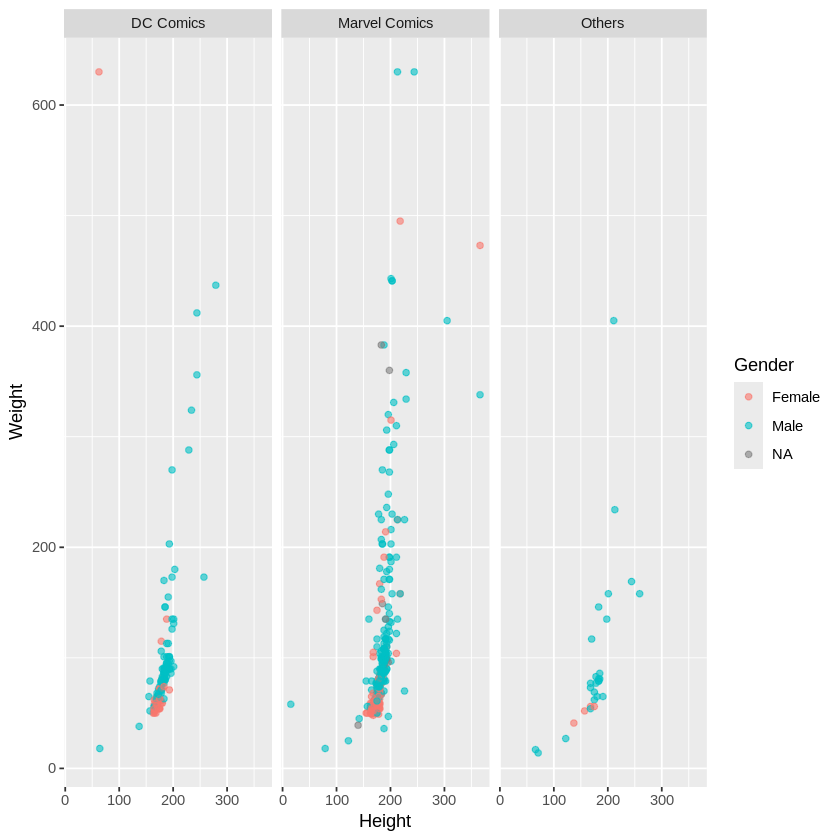

In [ ]:
f_heroes |>
ggplot(aes(x = Height, y = Weight, color=Gender)) +
geom_point(alpha = 0.6) +
facet_wrap(~ ifelse(Publisher %in% c("DC Comics", "Marvel Comics"), Publisher, "Others"))